In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Análise de Elasticidade

Para podermos fazer uma análise de Elasticidade, usamos a biblioteca pandas, para ler a manipular os dados tubalures, e usamos o Numpy para realizar calculos matemáticos.
A análise de elasticidade é uma técnica usada para medir a sensibilidade de uma variável em relação a outra. 

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [ ]:
# Criamos uma variável dados e estamos lendo um arquivo dados.csv
dados = pd.read_csv("/content/drive/MyDrive/PBL Estatistica/dados_diarios.csv", header=(0))

In [ ]:
# Vamos exibir as 10 primeiras linhas
dados.head(10)

Data      Custo     Receita
0  2021-01-01  15.447,74   88.367,36
1  2021-01-02  25.340,82  149.713,23
2  2021-01-03  25.842,21  139.300,03
3  2021-01-04  45.626,46  303.485,66
4  2021-01-05  44.272,42  288.469,46
5  2021-01-06  43.481,36  242.576,58
6  2021-01-07  45.313,24  249.288,59
7  2021-01-08  42.723,92  210.412,09
8  2021-01-09  41.249,65  173.331,83
9  2021-01-10  39.810,66  169.930,23

In [ ]:
display(dados)

Data      Custo     Receita
0    2021-01-01  15.447,74   88.367,36
1    2021-01-02  25.340,82  149.713,23
2    2021-01-03  25.842,21  139.300,03
3    2021-01-04  45.626,46  303.485,66
4    2021-01-05  44.272,42  288.469,46
..          ...        ...         ...
176  2021-06-26  50.644,66  183.752,08
177  2021-06-27  50.332,14  215.474,85
178  2021-06-28  86.319,69  341.991,00
179  2021-06-29  81.490,79  342.232,03
180  2021-06-30  78.182,09  347.178,75

[181 rows x 3 columns]

In [ ]:
# Exibindo as informações da nossa tabela
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Data     181 non-null    object
 1   Custo    181 non-null    object
 2   Receita  181 non-null    object
dtypes: object(3)
memory usage: 4.4+ KB


In [ ]:
# Vamos tirar a coluna data, para trabalharmos só com Custo e Receita
dados=dados.drop(['Data'], axis=1)




In [ ]:
# Exibindo Custo e Receita
dados

Custo     Receita
0    15.447,74   88.367,36
1    25.340,82  149.713,23
2    25.842,21  139.300,03
3    45.626,46  303.485,66
4    44.272,42  288.469,46
..         ...         ...
176  50.644,66  183.752,08
177  50.332,14  215.474,85
178  86.319,69  341.991,00
179  81.490,79  342.232,03
180  78.182,09  347.178,75

[181 rows x 2 columns]

In [ ]:
# VAmos tirar os pontos e deixar só 2 casas decimais

dados = pd.concat(
    [
        dados[col]
        .str.split()
        .str[0]
        .str.replace(".", "", regex=False)
        .str.replace(
            ",",
            ".",
        )
        .str.strip()
        for col in dados
    ],
    axis=1,
)

dados.head()

Custo    Receita
0  15447.74   88367.36
1  25340.82  149713.23
2  25842.21  139300.03
3  45626.46  303485.66
4  44272.42  288469.46

In [ ]:
# Vamos definir uma função para criarmos um modelo não linear
# Usando o modelo logistico

# É uma função do NumPy que calcula a exponencial de um valor. 
# Essa função, é calculada a exponencial de "(b - x) / c".

def funcao(x, a, b, c):
    return a / (1 + (np.exp((b - x) / c)))



In [ ]:
# vamos definir as colunas no dataframe
# E converter de string para float
x = dados["Custo"].astype("float")
y = dados["Receita"].astype("float")

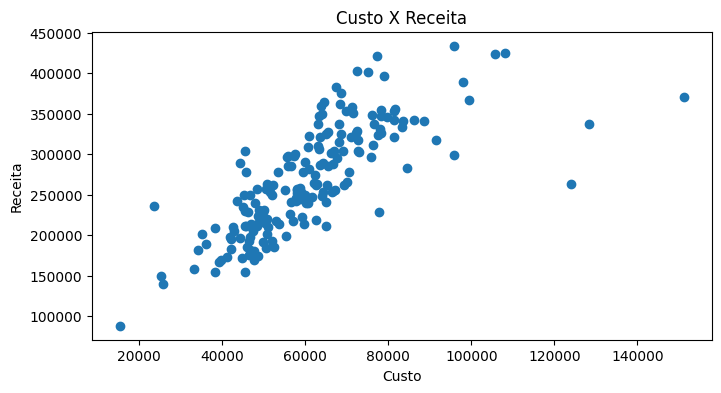

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(x, y, "o")
plt.title("Custo X Receita")
plt.xlabel("Custo")
plt.ylabel("Receita")
plt.show()

In [ ]:
# Vamos normalizar os dados
# pois o curvefit não modela para números muitos grande e fica melhor para visualização
xmin, xmax, ymin, ymax = np.min(x), np.max(x), np.min(y), np.max(y)
x_new = (x - xmin) / (xmax - xmin)
y_new = (y - ymin) / (ymax - ymin)

Aqui temos a Relação entre Custo e Receita Dados Normalizados

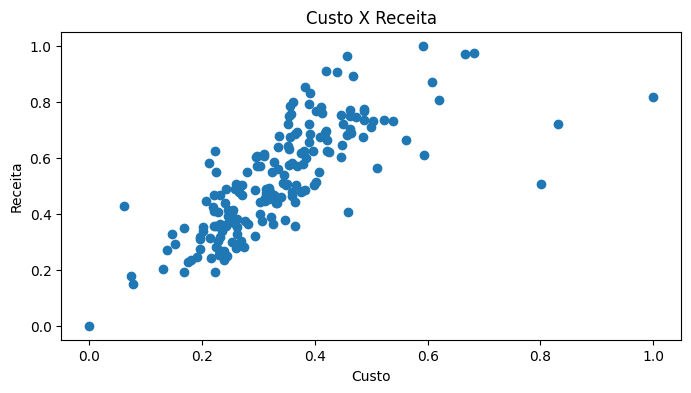

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(x_new, y_new, "o")
plt.title("Custo X Receita")
plt.xlabel("Custo")
plt.ylabel("Receita")
plt.show()

In [ ]:
# Criando o modelo a partir da função logística 
# com os novos valores de x normalizados

p, pcov = curve_fit(funcao, x_new, y_new)

In [ ]:
# Criando o CUSTO do modelo em um espaço linear
# cria um array de valores igualmente espaçados

# 0: É o valor de início do intervalo
# 1: É o valor final do intervalo.
# 500: É o número de pontos que você deseja gerar no intervalo

xarray = np.linspace(0, 1, 100)


In [ ]:
# Estimando a receita do modelo

yarray = np.array([funcao(x, *p) for x in xarray])


In [ ]:
# Voltando para o intervalo original

xarray_new = (xarray * (xmax - xmin)) + xmin
yarray_new = (yarray * (ymax - ymin)) + ymin

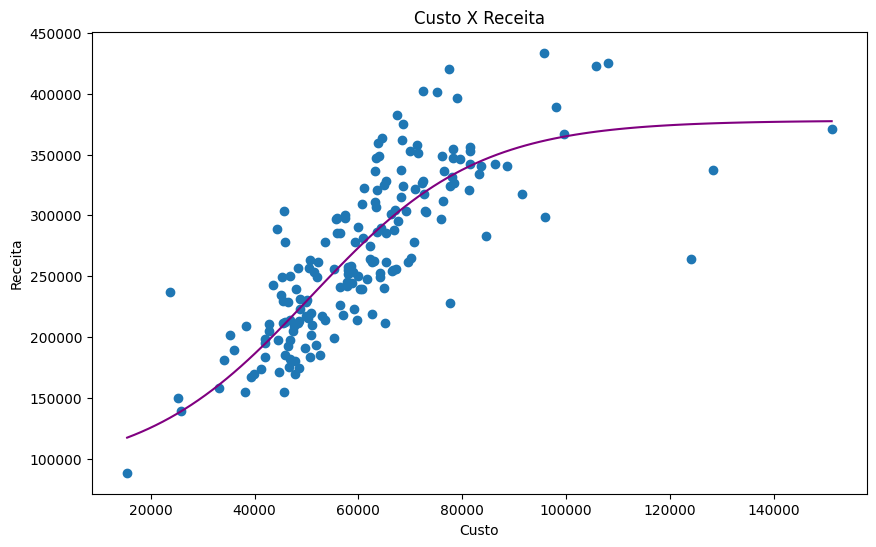

In [ ]:
# Plotando o gráfico predito
plt.figure(figsize=(10, 6))
plt.plot(x, y, "o")
plt.title("Custo X Receita")
plt.xlabel("Custo")
plt.ylabel("Receita")
plt.plot(xarray_new, yarray_new, "purple")
plt.show()

No gráfico a cima notamos que começamos com 20 mil de investimentos para termos aproximadamente uns 100 mil de Receita
notamos no gráfico o ponto de melhor investimentos seria nos 50 mil 
mas pra termos certeza, temos que encontar o ponto de inflexão
onde a curva muda

Calculando a derivada para encontrar o produto marginal

Produto Marginal é a variação da receita predita / variação do custo (derivada).

In [ ]:
# Ordenando os  os índices

idx = np.argsort(xarray_new)
x_sorted = xarray_new[idx]
y_sorted = yarray_new[idx]

In [ ]:
# Calcula a derivada, para encontrar o produto marginal

derivadas = [0]
for i in range(1, len(yarray_new)):
    derivadas.append((y_sorted[i] - y_sorted[i - 1]) / (x_sorted[i] - x_sorted[i - 1]))
derivadas = np.array(derivadas)

In [ ]:
max_derivadas = xarray_new[np.argmax(derivadas)] # Para saber o índice da posição onde a máxima derivada tem seu vértice 
# e com isso saber o valor do máximo marginal

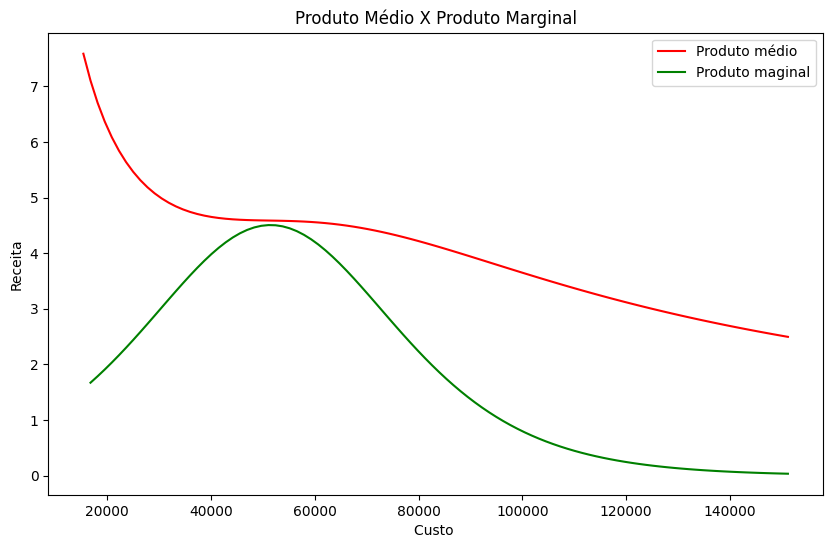

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Produto Médio X Produto Marginal")
plt.xlabel("Custo ")
plt.ylabel("Receita")
plt.plot(xarray_new, yarray_new / xarray_new, "Red", label="Produto médio") 
plt.plot(xarray_new[1:], derivadas[1:], "Green", label="Produto maginal")
plt.legend()
plt.show()

* Queremos achar o ponto máximo marginal e também queremos achar a interseção entre ambos, por isso fazemos um gráfico menos o outro, ou seja, o produto médio menos o produto marginal, e como queremos apenas a interseção depois do ponto máximo, pegamos o segundo valor. 

In [ ]:
menor = np.argsort(np.absolute((yarray_new / xarray_new) - derivadas))
indice_intersecao_direita = menor[0] if xarray_new[menor[0]] > xarray_new[menor[1]] else menor[1]

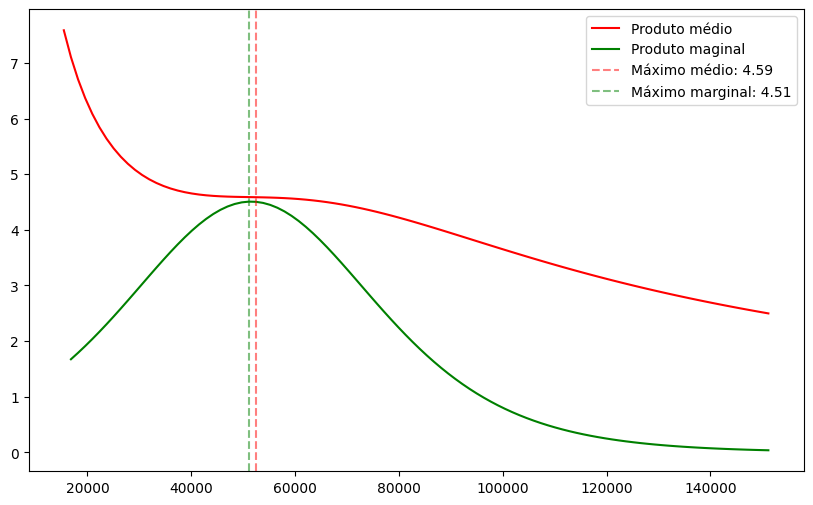

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(xarray_new, yarray_new / xarray_new, "Red", label="Produto médio") 
plt.plot(xarray_new[1:], derivadas[1:], "Green", label="Produto maginal")

plt.axvline( # Adiciona uma linha vertical na posição x
    x=xarray_new[indice_intersecao_direita],
    color="Red",
    label=f"Máximo médio: {round(yarray_new[indice_intersecao_direita] / xarray_new[indice_intersecao_direita], 2)}",
    linestyle="--",
    alpha=0.5,
)

plt.axvline(
    x=max_derivadas,
    color="Green",
    label=f"Máximo marginal: {round(max(derivadas), 2)}",
    linestyle="--",
    alpha=0.5,
)
plt.legend()

In [ ]:
print(f"Máximo_marginal=  {round(max_derivadas, 2)}, Receita=  {round(yarray_new[np.argmax(derivadas)], 2)}")
print(f"Máximo_Médio=  {round(xarray_new[indice_intersecao_direita], 2)}, Receita=  {round(yarray_new[indice_intersecao_direita], 2)}")

Máximo_marginal=  51088.24, Receita=  234389.27
Máximo_Médio=  52459.03, Receita=  240562.0


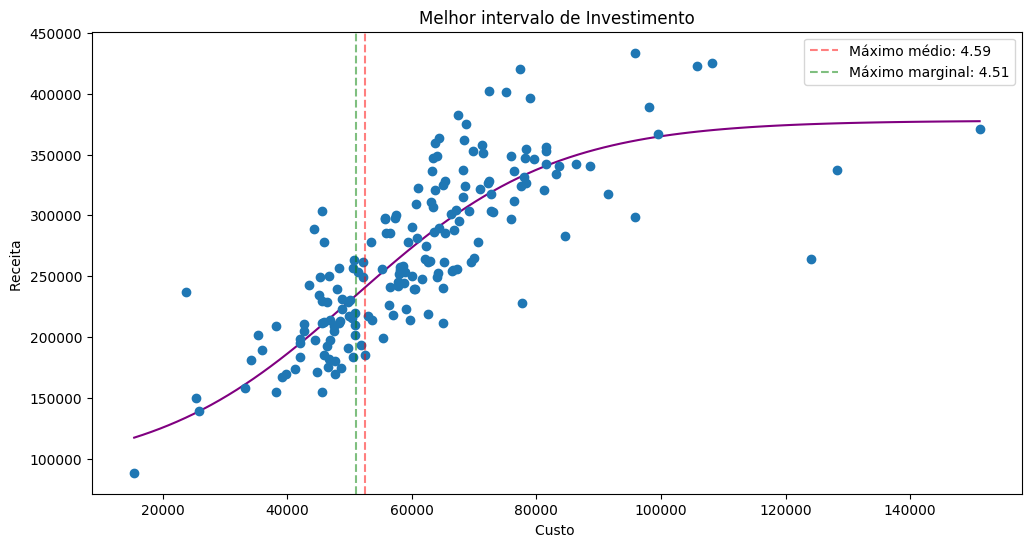

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(xarray_new, yarray_new, "purple")
plt.plot(x, y, "o")
plt.xlabel("Custo ")
plt.ylabel("Receita ")
plt.title("Melhor intervalo de Investimento")

plt.axvline( # Adiciona uma linha vertical na posição x
    x=xarray_new[indice_intersecao_direita],
    color="Red",
    label=f"Máximo médio: {round(yarray_new[indice_intersecao_direita] / xarray_new[indice_intersecao_direita], 2)}",
    linestyle="--",
    alpha=0.5,
)

plt.axvline(
    x=max_derivadas,
    color="Green",
    label=f"Máximo marginal: {round(max(derivadas), 2)}",
    linestyle="--",
    alpha=0.5,
)
plt.legend()

Podemos concluir que temos o máximo marginal de 4.51
e máximo médio de 4.59, esse seria o nosso melhor intervalo de investimentos, entre essas duas posições.

In [ ]:
print(f"Máximo_marginal= R$ {round(max_derivadas, 2)}, Receita= R$ {round(yarray_new[np.argmax(derivadas)], 2)}")
print(f"Máximo_Médio= R$ {round(xarray_new[indice_intersecao_direita], 2)}, Receita= R$ {round(yarray_new[indice_intersecao_direita], 2)}")

Máximo_marginal= R$ 51088.24, Receita= R$ 234389.27
Máximo_Médio= R$ 52459.03, Receita= R$ 240562.0


# Conclusões

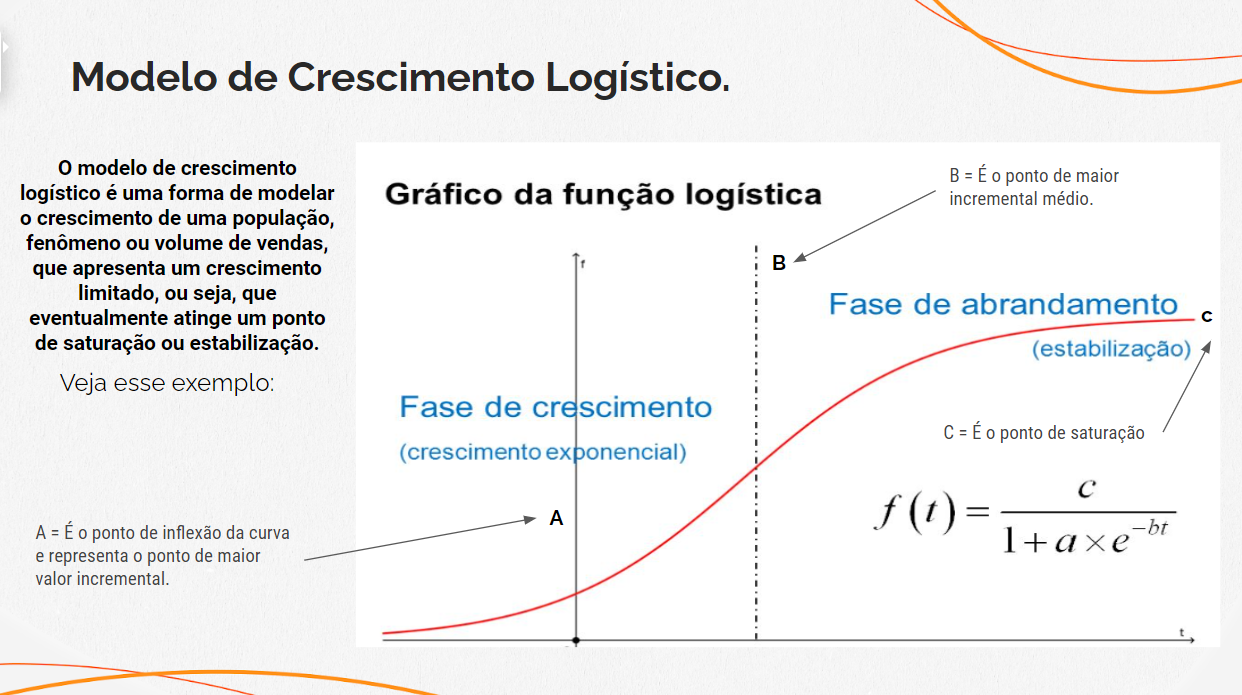

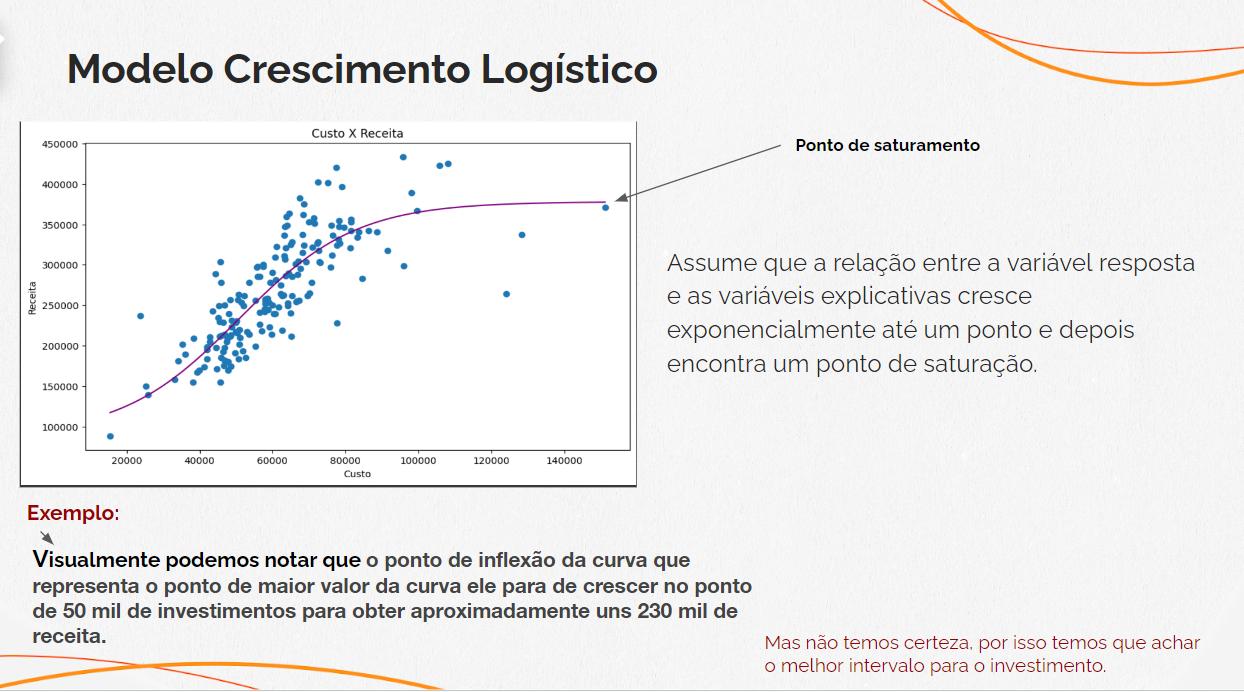

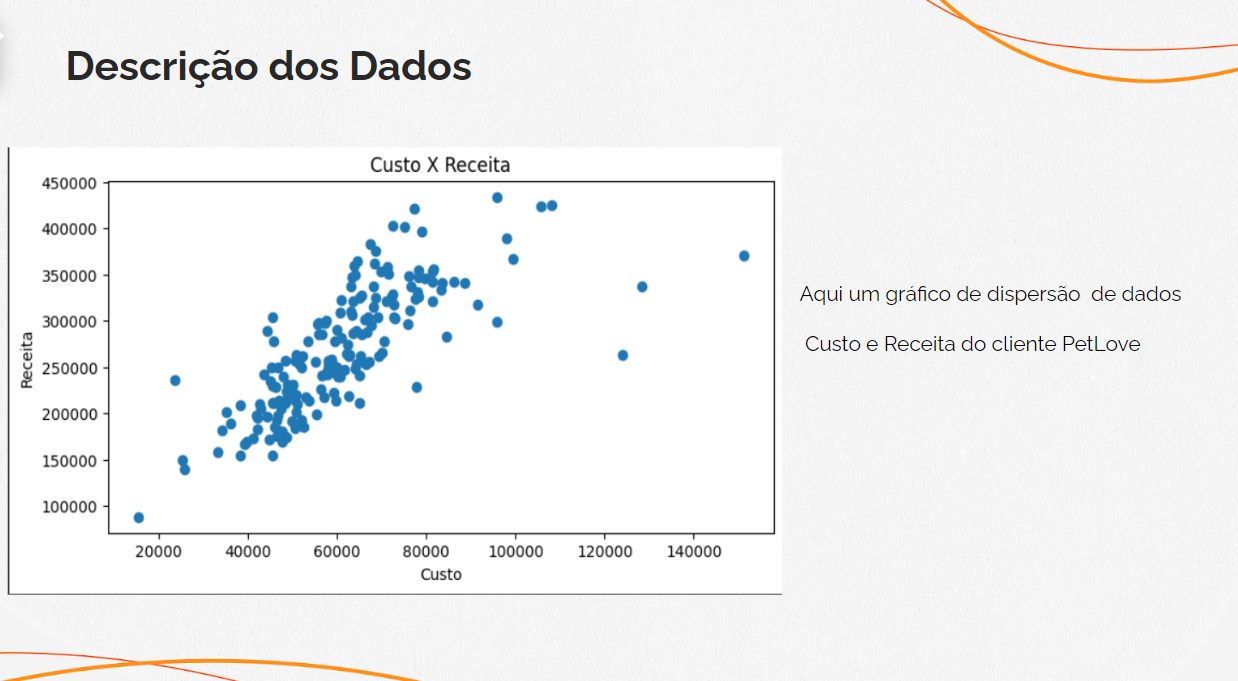

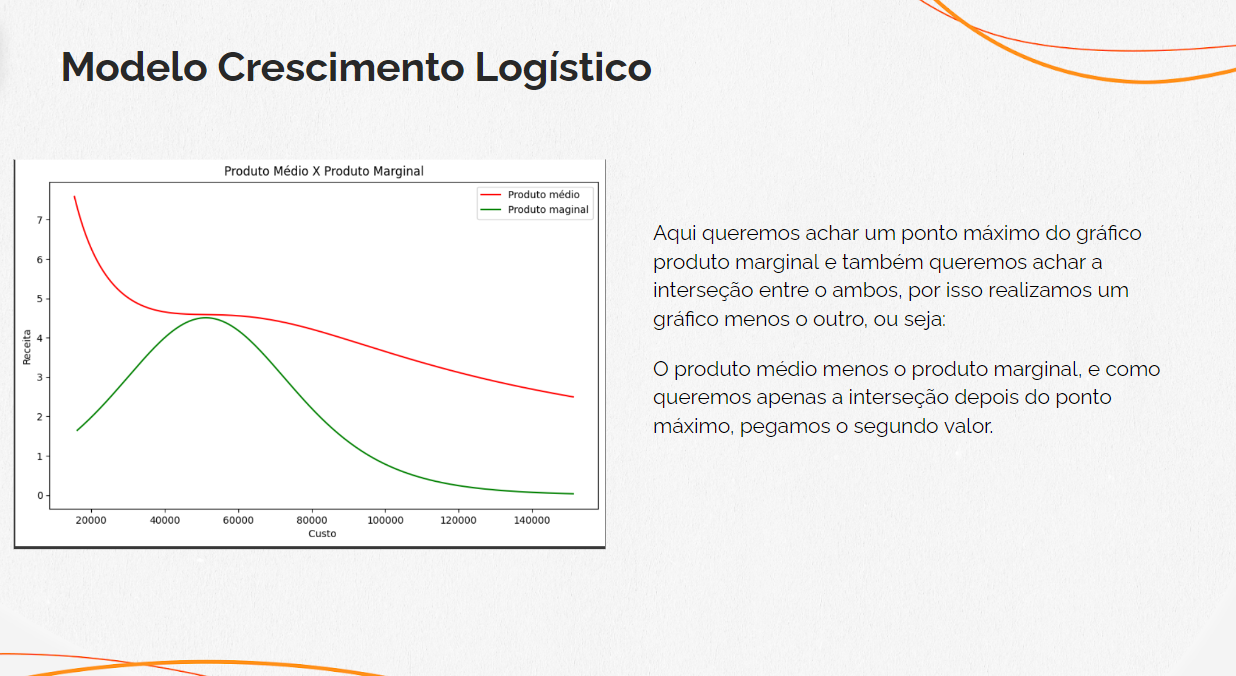

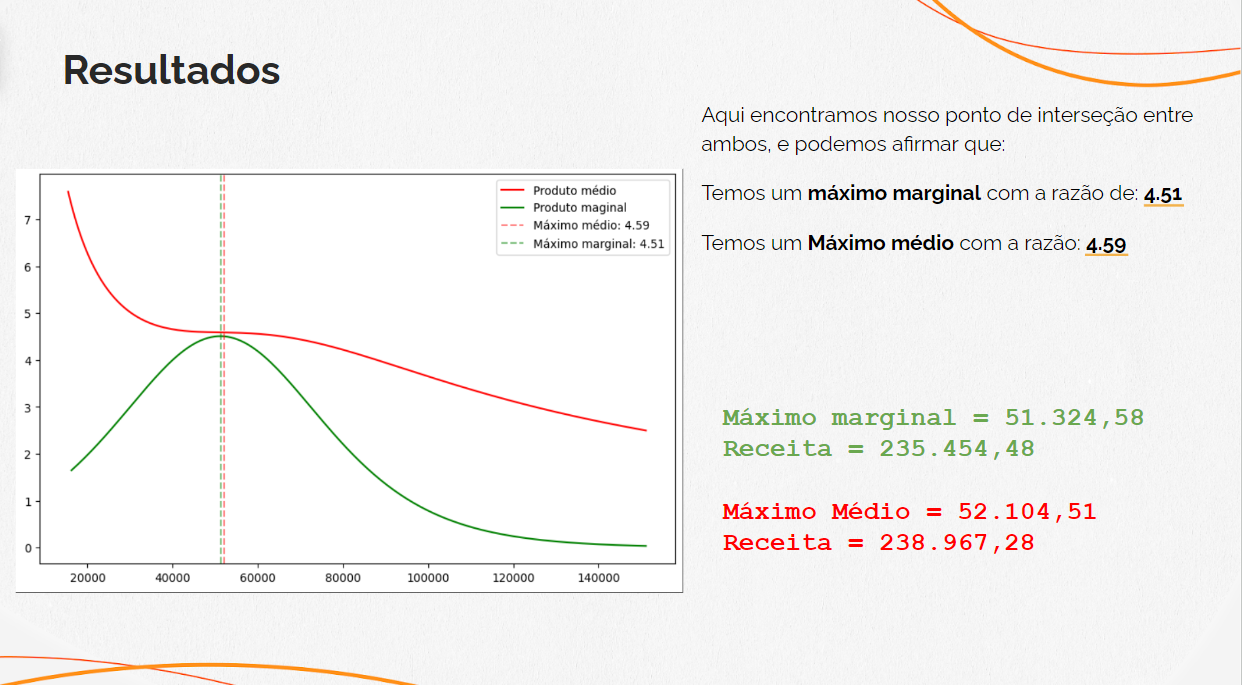

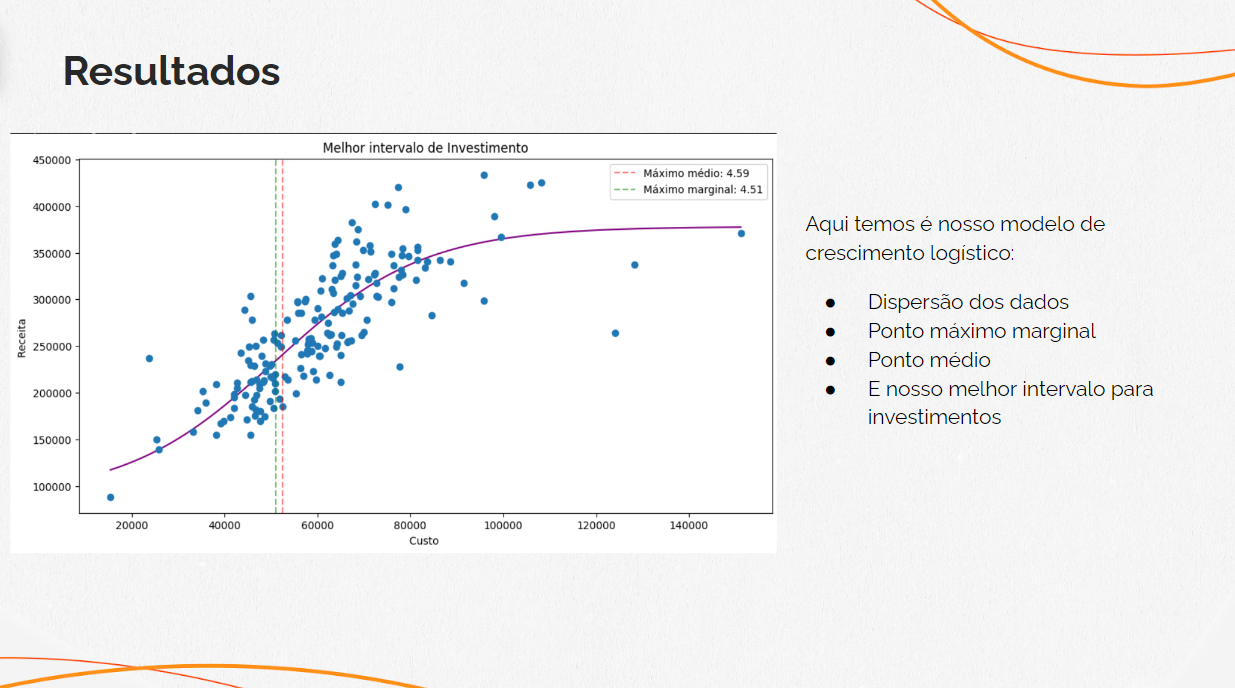

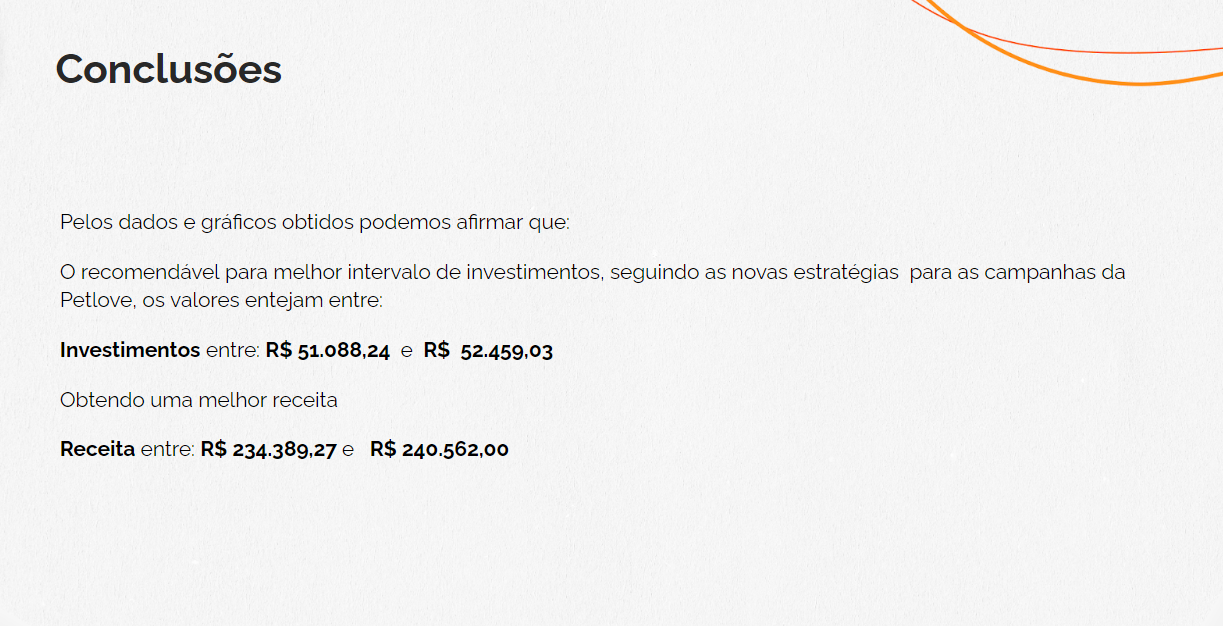